In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from arch import arch_model
import yfinance as yf

# retrieve financial data using yfinance
stock = '^NSEI'
start_date = '2020-01-01'
end_date = '2023-03-13'
data = yf.download(stock, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


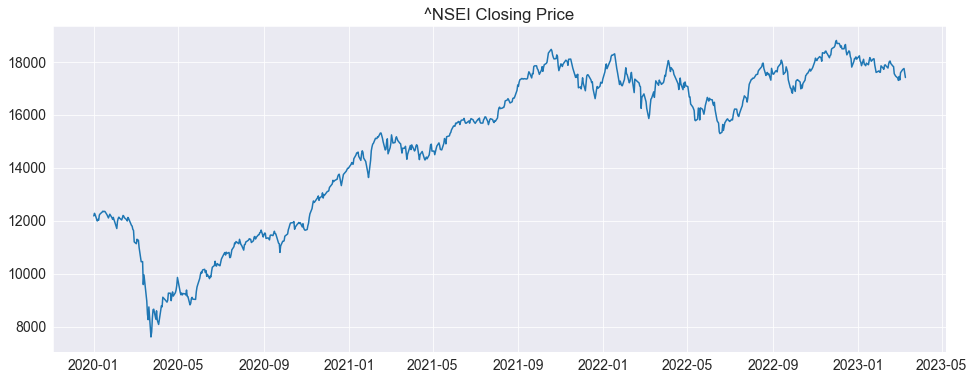

In [8]:
# plot the time series
plt.plot(data['Close'])
plt.title(f'{stock} Closing Price')
plt.show()

In [9]:
# create the ARCH/GARCH model
returns = 100 * data['Close'].pct_change().dropna()
model = arch_model(returns, vol='GARCH', p=1, o=0, q=1, dist='Normal')

In [10]:
# fit the model
results = model.fit(disp='off')
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1195.49
Distribution:                  Normal   AIC:                           2398.98
Method:            Maximum Likelihood   BIC:                           2417.68
                                        No. Observations:                  793
Date:                Tue, Mar 14 2023   Df Residuals:                      792
Time:                        05:21:23   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0924  3.613e-02      2.556  1.059e-02 [2.153e-0

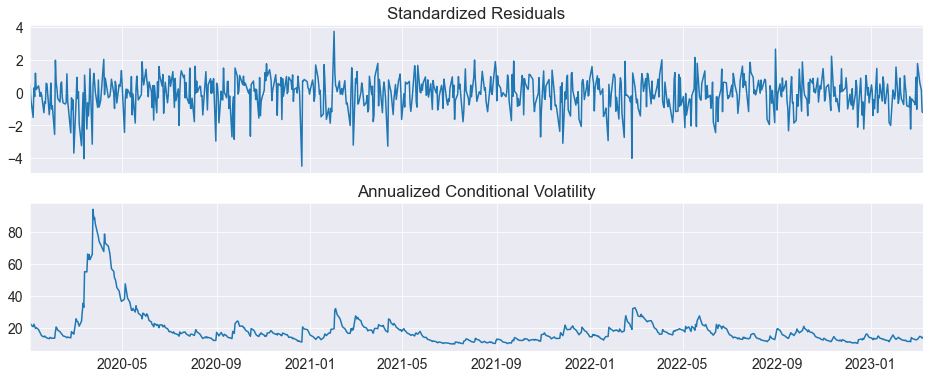

In [14]:
fig = results.plot(annualize="D")

In [15]:
# generate predictions
forecasts = results.forecast(horizon=30)
print(forecasts.mean[-1:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2023-03-10  0.092351  0.092351  0.092351  0.092351  0.092351  0.092351   

                h.07      h.08      h.09      h.10  ...      h.21      h.22  \
Date                                                ...                       
2023-03-10  0.092351  0.092351  0.092351  0.092351  ...  0.092351  0.092351   

                h.23      h.24      h.25      h.26      h.27      h.28  \
Date                                                                     
2023-03-10  0.092351  0.092351  0.092351  0.092351  0.092351  0.092351   

                h.29      h.30  
Date                            
2023-03-10  0.092351  0.092351  

[1 rows x 30 columns]


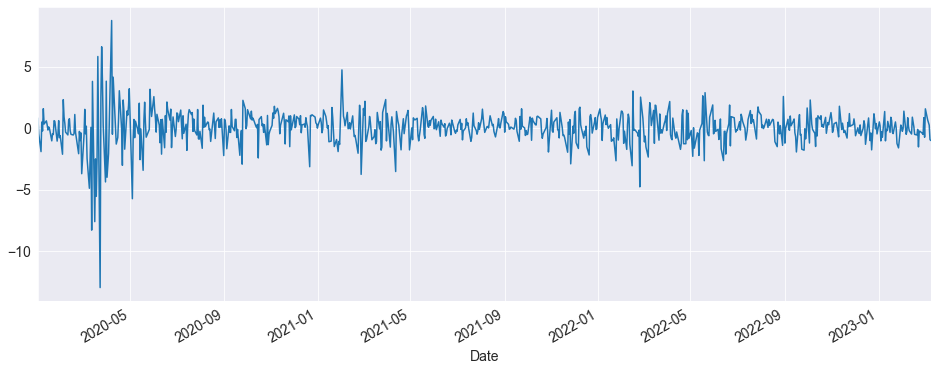

In [20]:
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())